In [1]:
import dibs_notebook_header
import dibs
import itertools
import multiprocessing
import numpy as np
import os
import pandas as pd
import time

In [2]:
num_procs = 6

In [3]:
def avg(low,high):
    return (low+high)/2

In [4]:
plow, phigh  = 125, 375
pmid = avg(plow,phigh)
lrlow, lrhigh  = 50, 300
lrmid = avg(lrlow, lrhigh)
eelow, eehigh = 150, 400
eemid=avg(eelow,eehigh)
kwargs_product = [{'tsne_perplexity': p,
                   'tsne_early_exaggeration': ee,
                   'tsne_learning_rate': lr,
                   'tsne_n_components': 2, 
                   'gmm_n_components': 8,  
                   
                   'cross_validation_n_jobs': 2,
                   'classifier_n_jobs':2, 
                   'tsne_n_jobs': 2,
                  } for p,ee, lr in itertools.product(
    [
        plow,
        pmid,
        phigh,
    ],
    [
        eelow,
#         eemid,
        eehigh,
    ],
    [
#         lrlow,
        lrmid,
#         lrhigh,
    ])]
names = [f'Pipeline_{i}' for i in range(len(kwargs_product))]
print('Number of combos:', len(kwargs_product))
# kwargs_product[:2]

Number of combos: 6


In [5]:
len(list(zip(names, kwargs_product)))

6

In [6]:
all_files = [os.path.join(dibs.config.DEFAULT_TRAIN_DATA_DIR, file) for file in os.listdir(dibs.config.DEFAULT_TRAIN_DATA_DIR)]
train_data = half_files = all_files[:int(len(all_files) * 0.35)]
train_data[:3]

['C:\\Users\\killian\\projects\\DIBS\\epm_data_csv_train\\EPM-MCE-10DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv',
 'C:\\Users\\killian\\projects\\DIBS\\epm_data_csv_train\\EPM-MCE-11DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv',
 'C:\\Users\\killian\\projects\\DIBS\\epm_data_csv_train\\EPM-MCE-12DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv']

In [7]:
pipe_results = [dibs.pipeline.PipelineMimic(name, **kwargs).add_train_data_source(*train_data) for name, kwargs in zip(names, kwargs_product)]
# print("Number of possible results", len(pipe_results))

2021-01-20 13:42:55,846 - C:\Users\killian\projects\DIBS\dibs\base_pipeline.py       - DEBUG    - Added file to train data: C:\Users\killian\projects\DIBS\epm_data_csv_train\EPM-MCE-10DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv
2021-01-20 13:42:55,963 - C:\Users\killian\projects\DIBS\dibs\base_pipeline.py       - DEBUG    - Added file to train data: C:\Users\killian\projects\DIBS\epm_data_csv_train\EPM-MCE-11DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv
2021-01-20 13:42:56,082 - C:\Users\killian\projects\DIBS\dibs\base_pipeline.py       - DEBUG    - Added file to train data: C:\Users\killian\projects\DIBS\epm_data_csv_train\EPM-MCE-12DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv
2021-01-20 13:42:56,200 - C:\Users\killian\projects\DIBS\dibs\base_pipeline.py       - DEBUG    - Added file to train data: C:\Users\killian\projects\DIBS\epm_data_csv_train\EPM-MCE-13DLC_resnet50_Maternal_EPMDec28shuffle1_180000.csv
2021-01-20 13:42:56,329 - C:\Users\killian\projects\DIBS\dibs\ba

In [8]:
len(pipe_results)

6

In [9]:
start = time.perf_counter()
with multiprocessing.Pool(num_procs) as pool:
    pipe_results = [pool.apply_async(pipe.build) for pipe in pipe_results]
    pipe_results = [res.get() for res in pipe_results]
end = time.perf_counter()
print(f'Total compute time: {(end-start)/60} minutes')

Total compute time: 9.79931263 minutes


In [10]:
print(f'Total compute time: {(end-start)/60} minutes')

Total compute time: 9.79931263 minutes


In [11]:
print('Mins to build:', (end-start)/60)

Mins to build: 9.79931263


perp 150.0 ee 150.0 lr 175.0


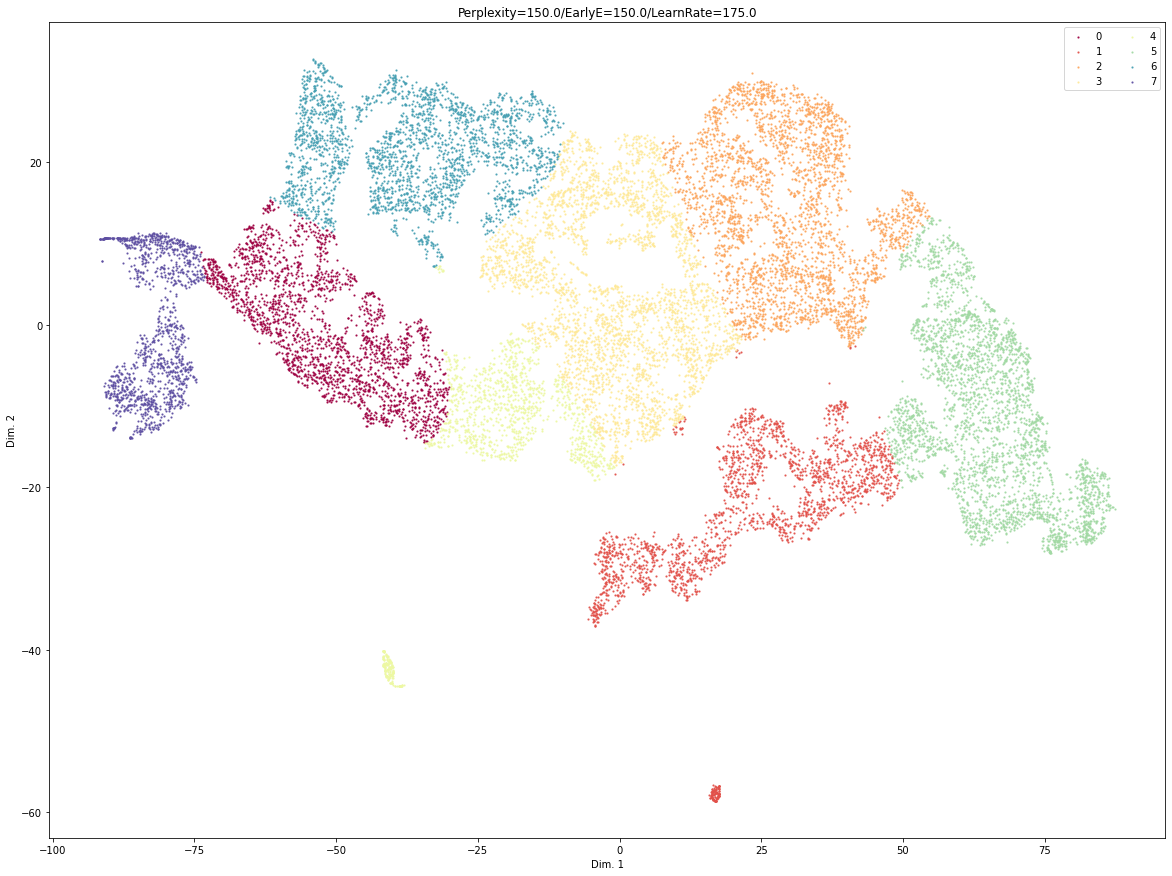

-----------------------------------
perp 150.0 ee 400.0 lr 175.0


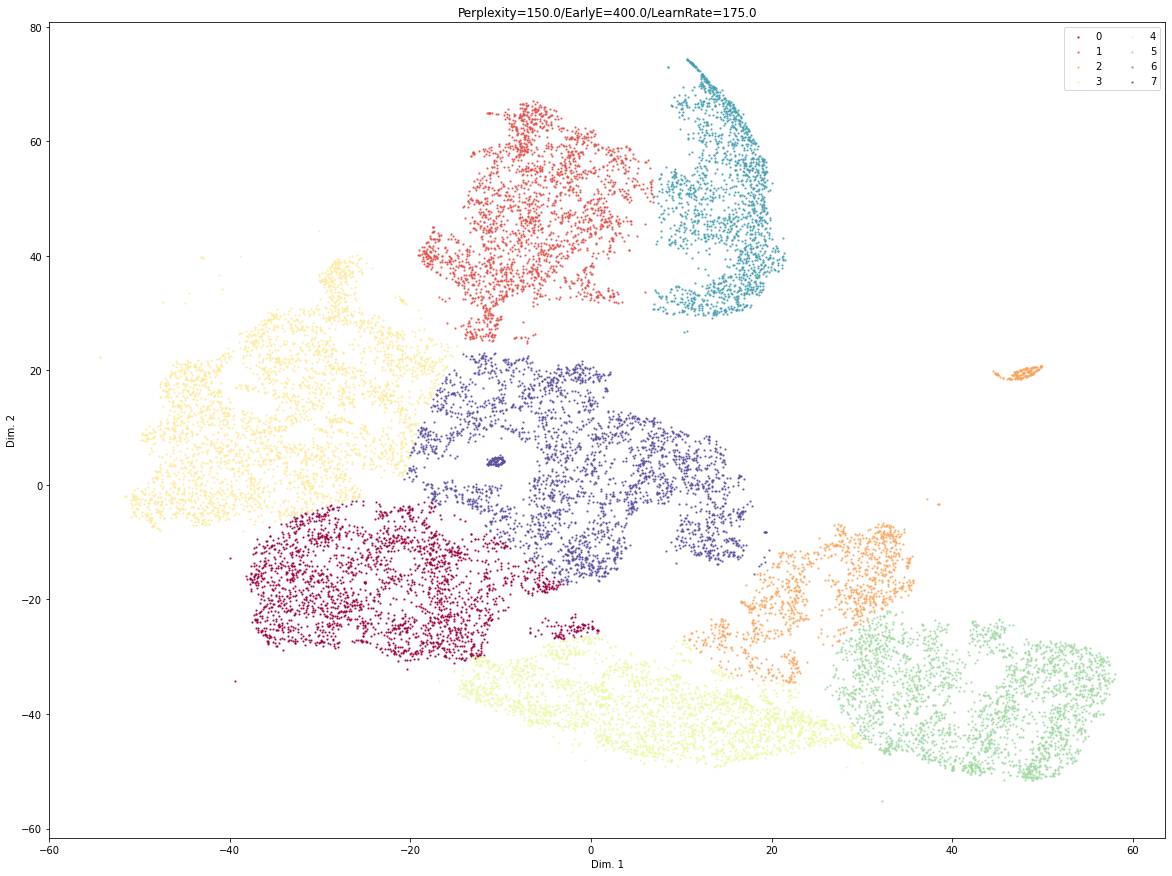

-----------------------------------
perp 300.0 ee 150.0 lr 175.0


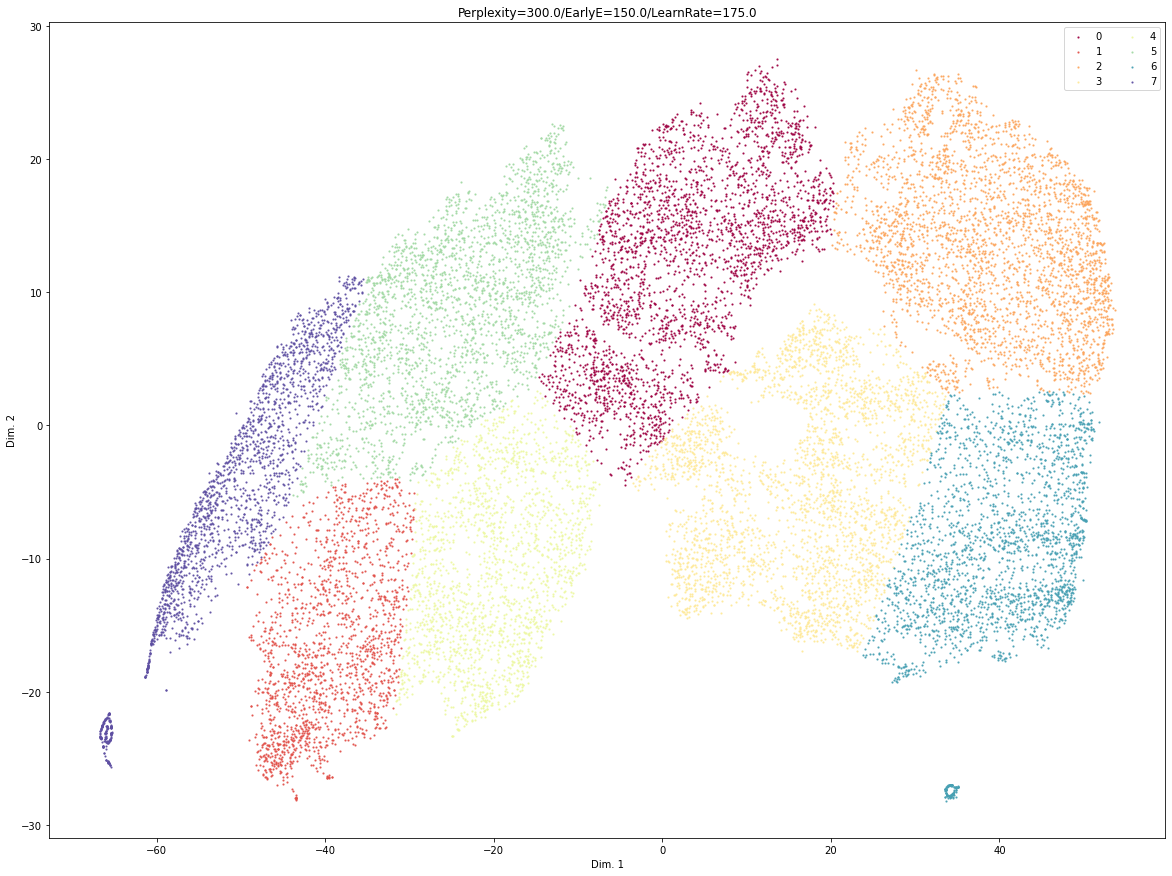

-----------------------------------
perp 300.0 ee 400.0 lr 175.0


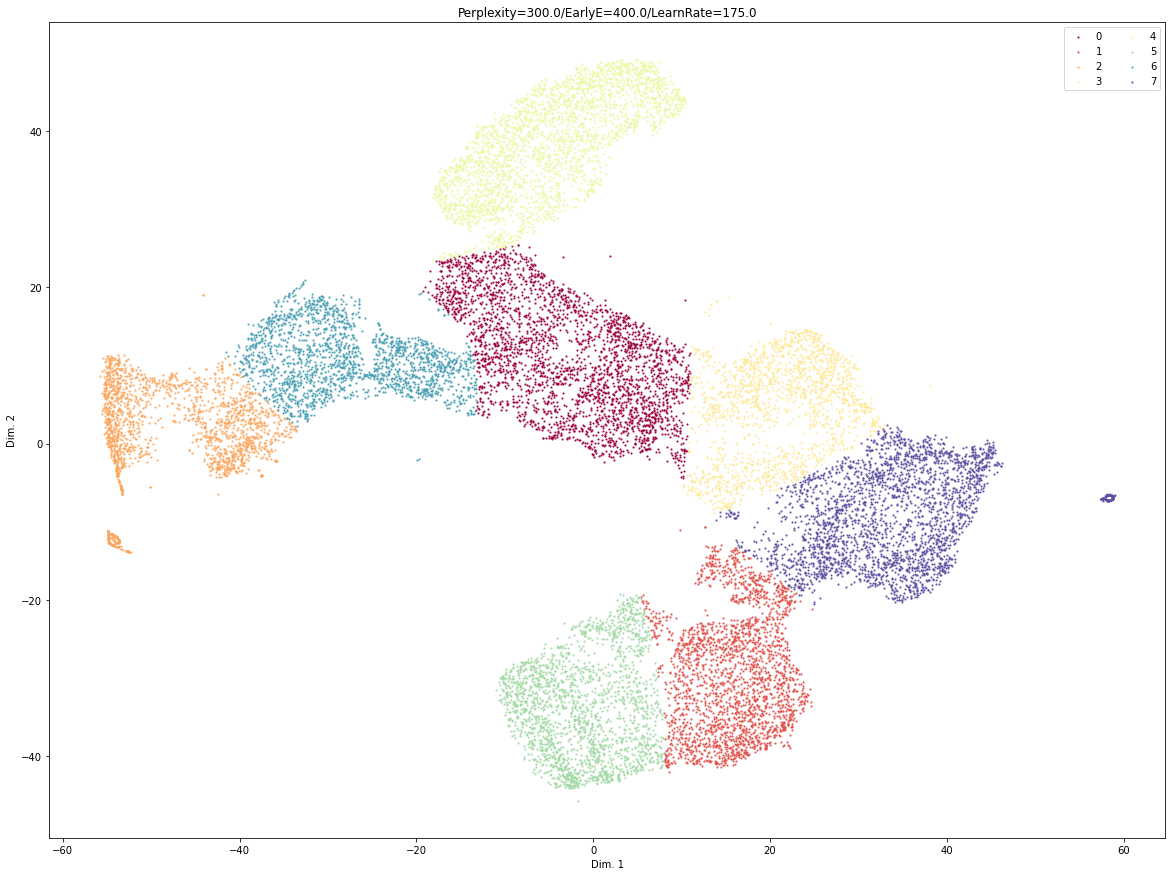

-----------------------------------
perp 450.0 ee 150.0 lr 175.0


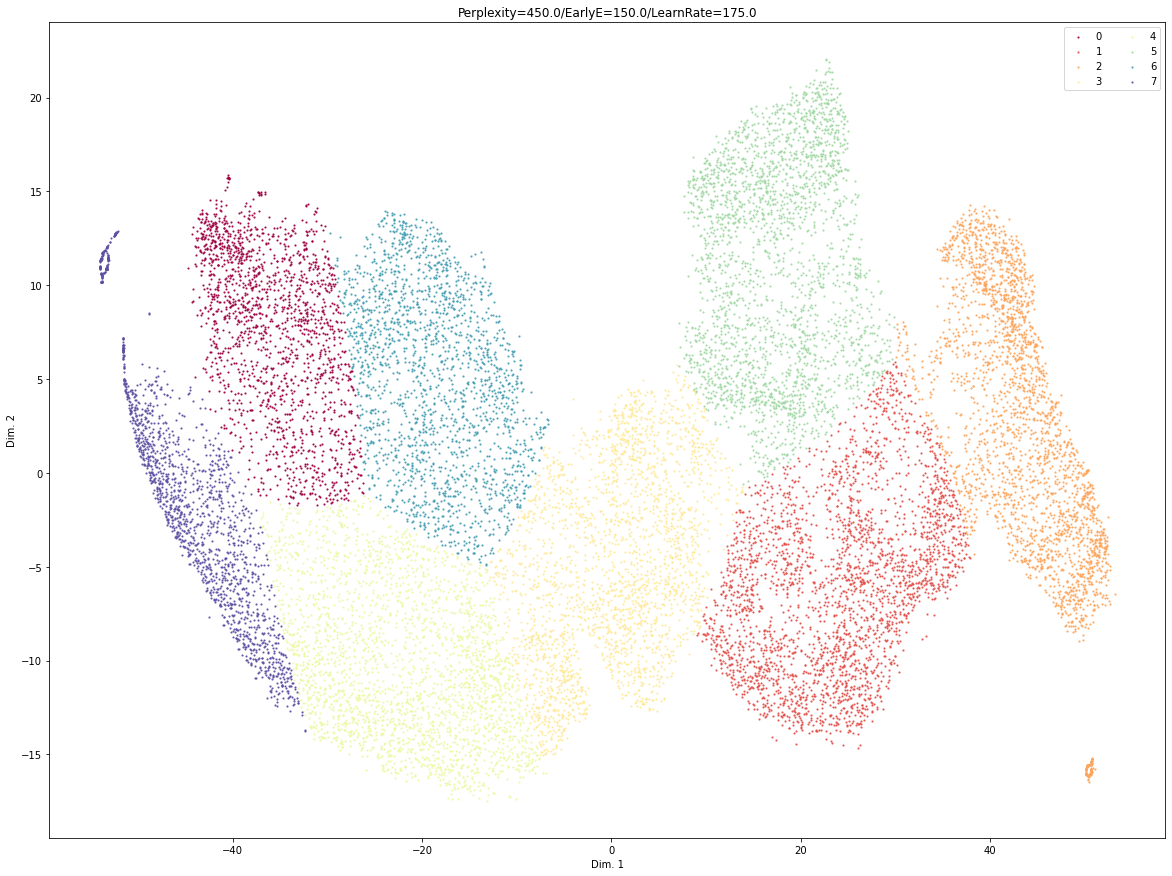

-----------------------------------
perp 450.0 ee 400.0 lr 175.0


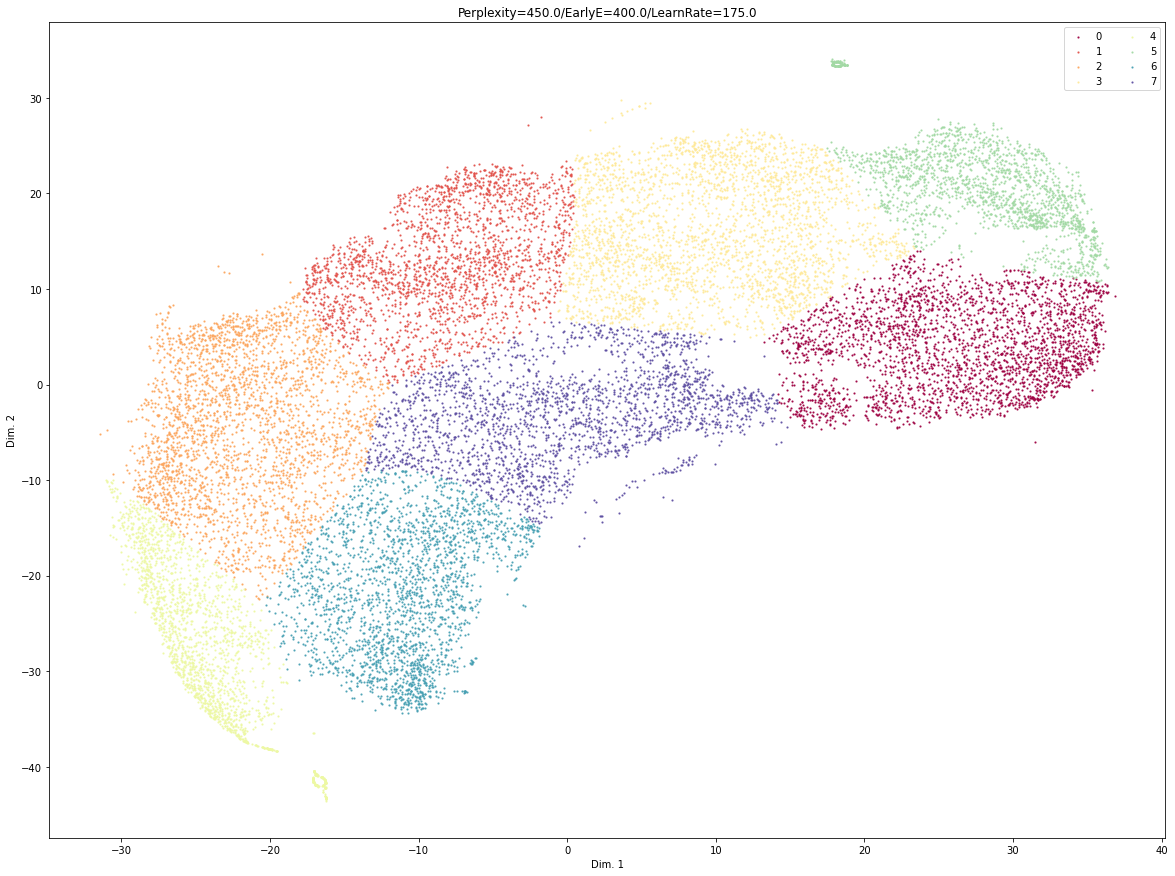

-----------------------------------


In [12]:
for i, pipe in enumerate(pipe_results):
    p,lr,ee = pipe.tsne_perplexity, pipe.tsne_learning_rate, pipe.tsne_early_exaggeration
    print('perp', p , 'ee', ee, 'lr', lr)
    pipe.plot_clusters_by_assignments(show_now=True, save_to_file=True, figsize=(20,15),s=1.5)
    print('-----------------------------------')

In [15]:
print('All done!')

All done!


In [14]:
dibs.pipeline.logger.info('All done!')

2021-01-20 13:52:51,498 - C:\Users\killian\projects\DIBS\dibs\pipeline.py            - INFO     - All done!
